### Problem Statement : *To build a classification methodology to predict the type of Thyroid a person has ,based on the below features.*

age - Age of the person

sex - Male or Female

on_thyroxine - true or false

on_antithyroid_medication - true or false

sick - true or false

pregnant - true or false

thyroid_surgery - true or false

I131_treatment - true or false 
`(Radioiodine therapy is a nuclear medicine treatment. Doctors use it to treat an overactive thyroid, a condition called hyperthyroidism.)`

query_hypothyroid - true or false

query_hyperthyroid -true or false

lithium - true or false

goitre - true or false

tumor - true or false

hypopituitary- true or false

psych - true or false
`(People with thyroid disorders often have emotional or mental health symptoms as well as physical symptoms)`

TSH_measured - true or false

TSH - thyroid stimulating hormone floating value
`(TSH tells your thyroid how much thyroid hormone it needs to make. If the thyroid hormone levels in your blood are too low, your pituitary gland makes larger amounts of TSH to tell your thyroid to work harder. If your thyroid hormone levels are too high, the pituitary gland makes little or no TSH.)`

T3_measured - true or false

T3 - triiodothyronine value
`(A T3 test is most often used to diagnose hyperthyroidism, a condition in which the body makes too much thyroid hormone.)`

TT4_measured- true or false

TT4 - Thyroxine value
`(The normal range for free T 4 in adults is 0.8 to 1.8 nanograms per deciliter (ng/dL). A level of free T 4 that is higher than normal could mean you have an overactive thyroid. Conditions linked to hyperthyroidism include Graves disease, an autoimmune disorder. Abnormally low free T 4 levels may signal hypothyroidism.)`

T4U_measured- true or false

T4U - numerical value

FTI_measured- true or false

FTI -Free Thyroxine Index
`(The free T4 index (FTI) is a blood test used to diagnose thyroid disorders. T4, also called thyroxine, is a thyroid hormone. The test measures how much of it is in your blood to help determine whether your thyroid gland is underactive (hypothyroidism) or overactive (hyperthyroidism).)`

TBG_measured- true or false

TBG -Thyroid-Binding Globulin value
`(Thyroxine-binding globulin (TBG) is a major transport protein, which is primarily responsible for binding to and transporting thyroid hormones to the necessary tissues)`

referral_source - different sources of referals

Class - different types of thyroid :
 - compensated_hypothyroid
 - negative
 - primary_hypothyroid
 - secondary_hypothyroid

In [1]:
#importing useful libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import pickle


In [2]:
df = pd.read_csv("hypothyroid.csv")

In [3]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative


- we can see many columns has value "?". we will replace "?" with NaN

In [4]:
df = df.replace('?', np.NaN)

In [5]:
#counting number of "?" left.
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count ==0:
        print(column, df[column][df[column]=='?'].count())

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH_measured 0
TSH 0
T3_measured 0
T3 0
TT4_measured 0
TT4 0
T4U_measured 0
T4U 0
FTI_measured 0
FTI 0
TBG_measured 0
TBG 0
referral_source 0
Class 0


- looks like all "?" are successfully replaced by NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [7]:
df.isna().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

- we can see that whole TBG column contains only NaN values, so we consider that TBG column is not important. So we are dropping TBG column 

- Columns like 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', and 'TBG_measured'  have only T and F value.
- These columns represent whether the respective column constain a value or not. So we can drop these columns also.

In [8]:
df = df.drop(columns=['TBG','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured', 'referral_source'])

In [9]:
#converting male(M) =1, female(F) =0
df['sex'] = df['sex'].map({'F' : 0, 'M' : 1})

In [10]:
#converting all f & t into 0 & 1 respectively.
for column in df.columns:
    if  len(df[column].unique())==2:
        df[column] = df[column].map({'f' : 0, 't' : 1})

In [11]:
#getting all the unique values of Class cloumn
df["Class"].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [12]:
encode = LabelEncoder().fit(df['Class'])

df['Class'] = encode.transform(df['Class'])

# we will save the encoder as pickle to use when we do the prediction. We will need to decode the predcited values
# back to original

file = "enc.pickle"
pickle.dump(encode, open(file, "wb"))

In [13]:
dict(zip(encode.classes_,range(len(encode.classes_))))

{'compensated_hypothyroid': 0,
 'negative': 1,
 'primary_hypothyroid': 2,
 'secondary_hypothyroid': 3}

In [14]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.3,2.5,125,1.14,109,1
1,23,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.1,2,102,NaN,NaN,1
2,46,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,NaN,109,0.91,120,1
3,70,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.9,175,NaN,NaN,1
4,70,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61,0.87,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,1
3768,68,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2.1,124,1.08,114,1
3769,74,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.1,1.8,112,1.07,105,1
3770,72,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.7,2,82,0.94,87,1


In [15]:
# replacing missing values by using KNN Imputer
imp = KNNImputer(n_neighbors=3, weights= 'uniform', missing_values= np.nan)
df_p = pd.DataFrame(data = np.round(imp.fit_transform(df)), columns= df.columns)

In [16]:
df_p

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,125.0,1.0,109.0,1.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,2.0,102.0,1.0,108.0,1.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,109.0,1.0,120.0,1.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,175.0,1.0,177.0,1.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,61.0,1.0,70.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,3.0,112.0,1.0,117.0,1.0
3768,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,124.0,1.0,114.0,1.0
3769,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,2.0,112.0,1.0,105.0,1.0
3770,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,82.0,1.0,87.0,1.0


In [17]:
df_p.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.737275,0.306999,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,0.009014,0.025451,0.000265,0.048780,4.824761,2.023860,108.528102,1.020944,110.361877,0.974814
std,20.082478,0.461310,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.094525,0.157510,0.016282,0.215437,23.324246,0.791739,35.026694,0.165546,32.269298,0.279508
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,88.000000,1.000000,93.000000,1.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,104.000000,1.000000,107.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,124.000000,1.000000,124.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,530.000000,11.000000,430.000000,2.000000,395.000000,3.000000


- here we observed that maximum age is 455 in age column, age cannot be 455 so we drop that row

In [18]:
df_p = df_p.drop(index=1364)

In [19]:
df_p.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
count,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,...,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000
mean,51.630337,0.307080,0.123044,0.013259,0.011403,0.038982,0.014055,0.014055,0.015646,0.062053,...,0.009016,0.025457,0.000265,0.048793,4.825776,2.023866,108.525590,1.020949,110.363564,0.974808
std,18.980673,0.461344,0.328532,0.114397,0.106187,0.193577,0.117732,0.117732,0.124117,0.241283,...,0.094537,0.157531,0.016284,0.215464,23.327256,0.791844,35.030999,0.165567,32.273412,0.279544
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,88.000000,1.000000,93.000000,1.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,104.000000,1.000000,107.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,124.000000,1.000000,124.000000,1.000000
max,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,530.000000,11.000000,430.000000,2.000000,395.000000,3.000000


In [20]:
df_p.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
dtype: int64

- Now there are no missing values left

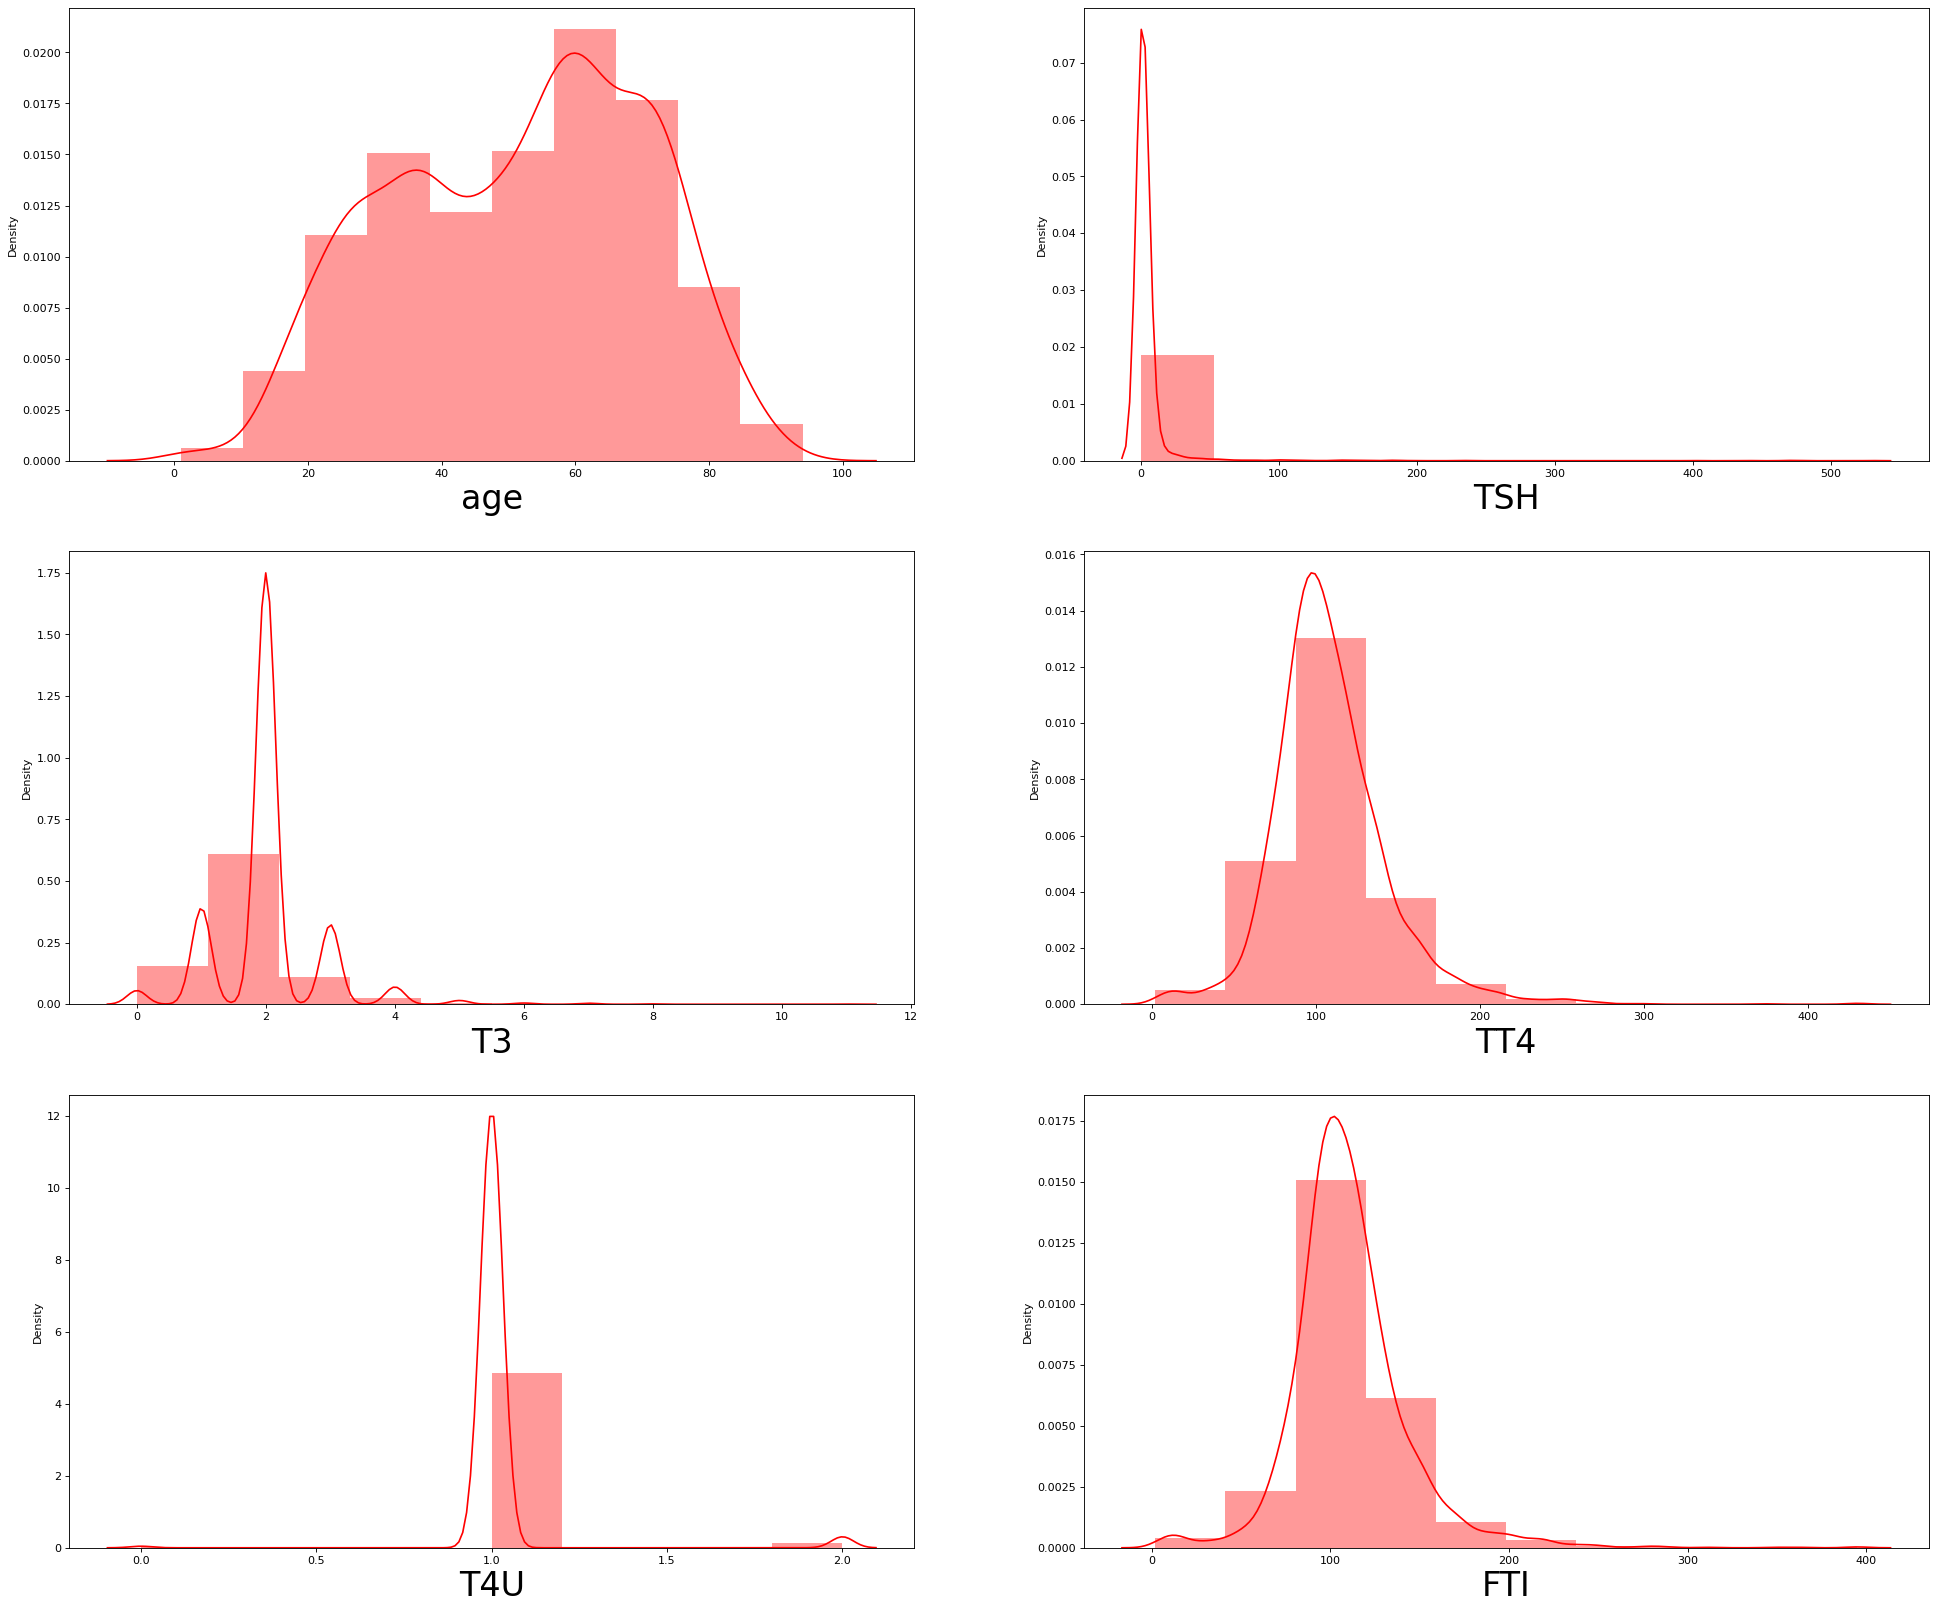

In [21]:
#checking skewness of the numerical columns

columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(30, 25), dpi= 80)
plotnumber = 1
for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(df_p[column], bins=10, kde=True, color = 'red')
    plt.xlabel(column, fontsize=30)
    plotnumber+=1
plt.show()

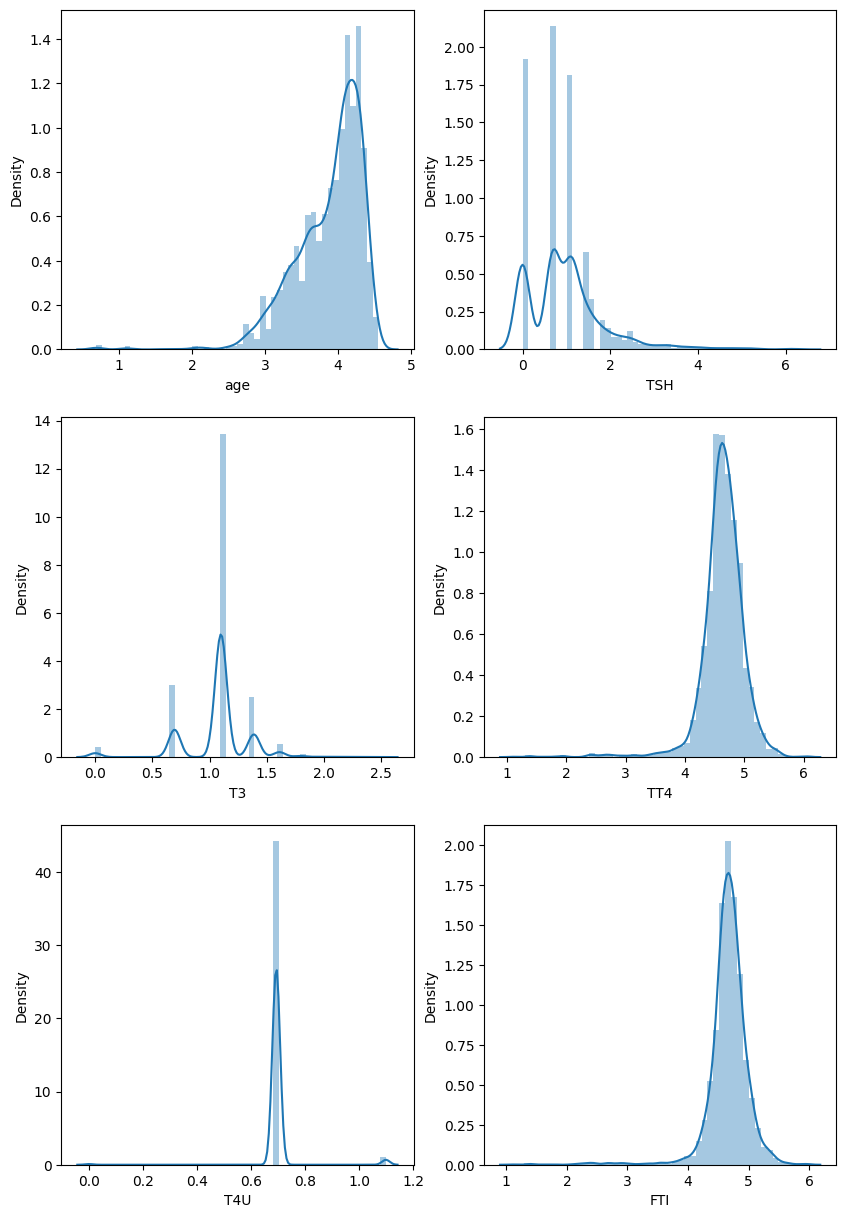

In [22]:
#taking log to remove the skewness

plt.figure(figsize=(10,15),facecolor='white')
pltnumber = 1

for column in columns:
    df_p[column]+=1
    ax = plt.subplot(3,2,pltnumber)
    sns.distplot(np.log(df_p[column]))
    plt.xlabel(column,fontsize=10)
    pltnumber+=1
plt.show()

- TSH column is still heavely skewed so we drop it

In [23]:
df_p = df_p.drop(['TSH'],axis=1)

In [24]:
df_p.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'T3', 'TT4', 'T4U', 'FTI',
       'Class'],
      dtype='object')

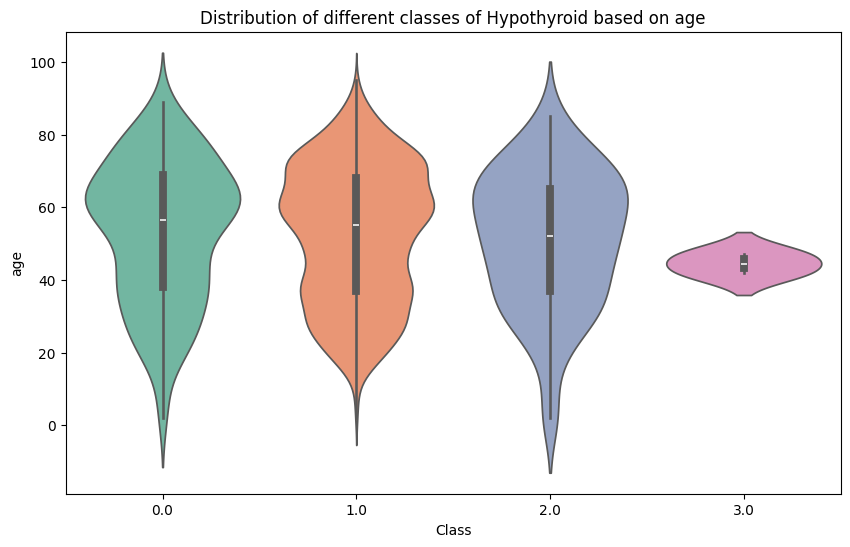

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a violin plot using seaborn
plt.figure(figsize=(10,6))
sns.violinplot(data=df_p, x="Class", y="age", palette="Set2")
plt.title("Distribution of different classes of Hypothyroid based on age")
plt.show()

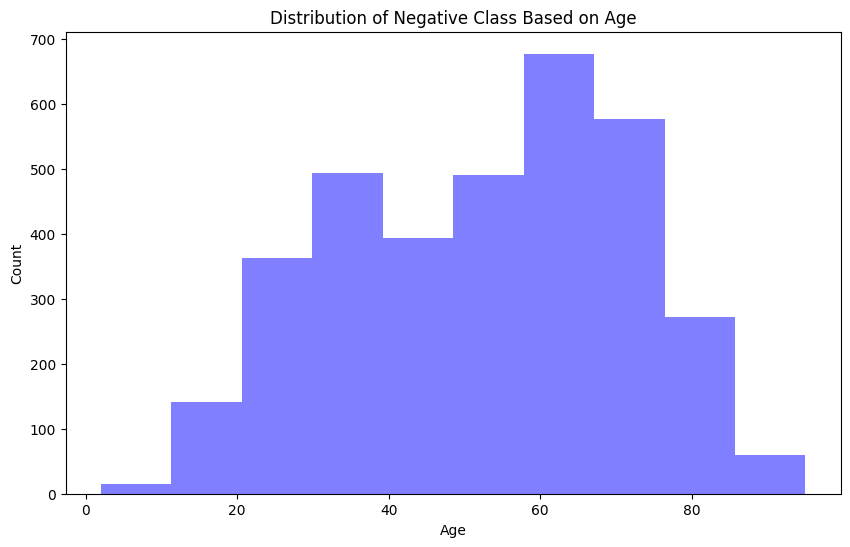

In [26]:
# Filter the data for negative class
negative_df = df_p[df_p['Class'] == 1]

# Create a histogram using matplotlib
plt.figure(figsize=(10,6))
plt.hist(negative_df['age'], color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Negative Class Based on Age')
plt.show()


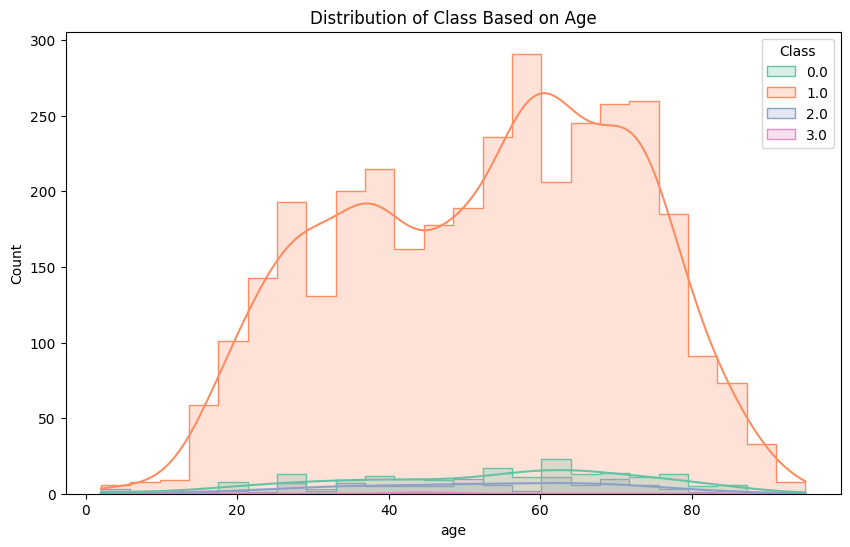

In [28]:
# Create a histogram with overlay using seaborn
plt.figure(figsize=(10,6))
sns.histplot(df_p, x="age", hue="Class", element="step", kde=True, palette="Set2")
plt.title('Distribution of Class Based on Age')
plt.show()


In [75]:
# fig = px.histogram(df_p, x="age", color = "Class", barmode= 'overlay',
#                 title="Distribution of Class Based on Age")
# fig.show() 

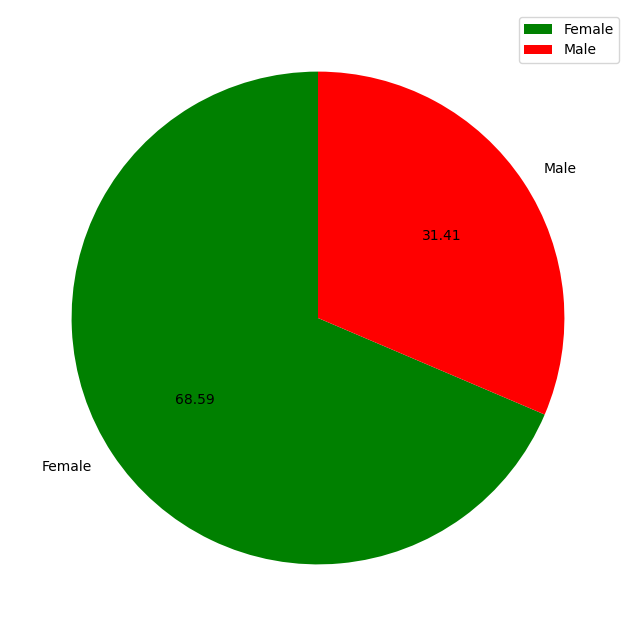

In [30]:
plt.figure(figsize=(10,8))
plt.pie(x=negative_df.sex.value_counts(),
        labels=['Female','Male'],
        startangle = 90,
        colors=['green','red'],
        autopct='%.2f'
       );
plt.legend();

In [31]:
# plt.figure(figsize=(20,25), facecolor='white')
# plotnumber = 1
# plt_data = df_p.drop(['age'], axis =1)

# for column in plt_data:
#     ax = plt.subplot(6,5,plotnumber)
#     sns.countplot(plt_data[column])
#     plt.xlabel(column,fontsize=10)
#     plotnumber+=1
# plt.show()

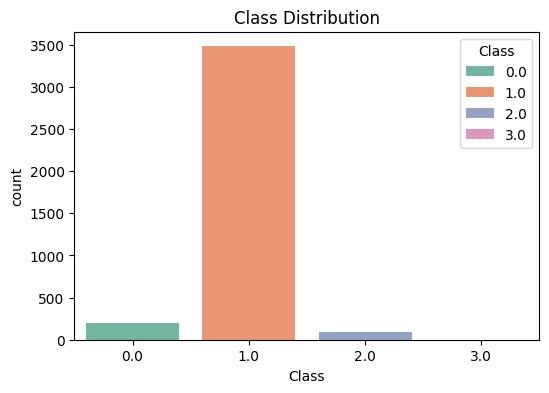

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot using matplotlib
plt.figure(figsize=(6,4))
sns.countplot(data=df_p, x='Class', hue = "Class", palette="Set2")
plt.title('Class Distribution')
plt.show()


- We can clearly see that our data is highly imbalanced

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(-0.5, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5')])

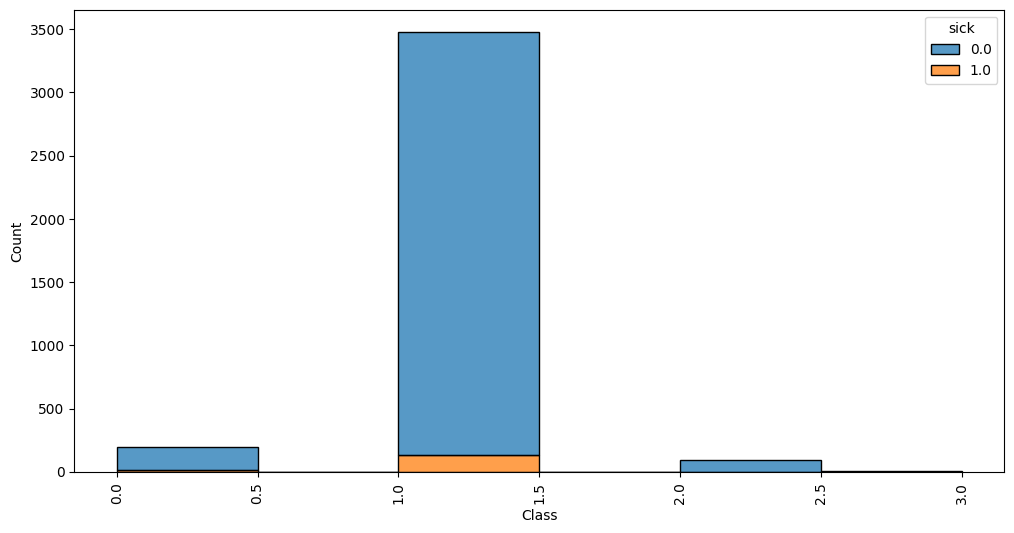

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="sick", data=df_p, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

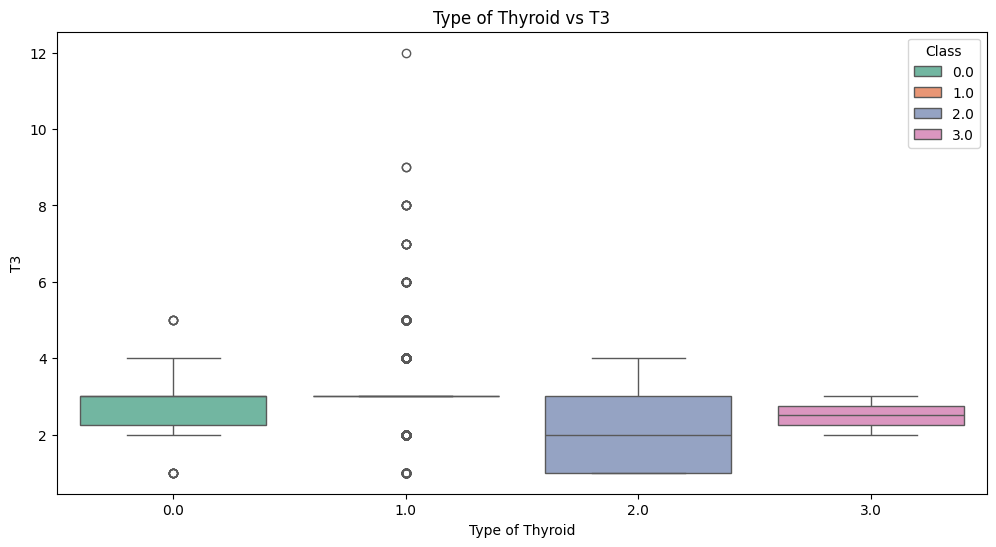

In [34]:
df_p['T3'] = pd.to_numeric(df_p['T3'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "T3", data = df_p, hue = "Class", palette="Set2")
plt.title("Type of Thyroid vs T3")
plt.xlabel("Type of Thyroid")
plt.ylabel("T3")
plt.show()

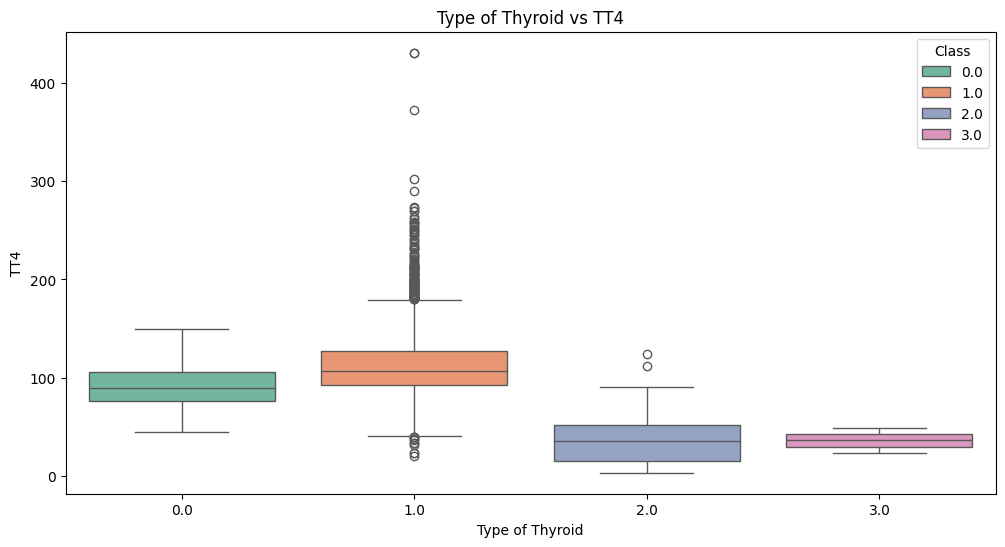

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot with different colors for each class using matplotlib
plt.figure(figsize=(12,6))
sns.boxplot(x="Class", y="TT4", data=df_p, hue="Class", palette="Set2")
plt.title("Type of Thyroid vs TT4")
plt.xlabel("Type of Thyroid")
plt.ylabel("TT4")
plt.show()


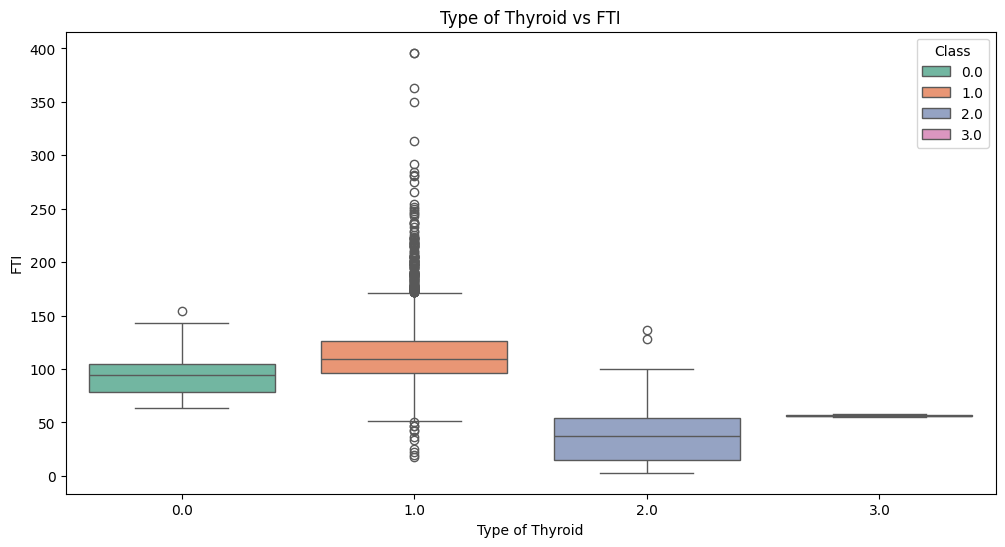

In [36]:
df_p['FTI'] = pd.to_numeric(df_p['FTI'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "FTI", data = df_p, hue="Class", palette="Set2")
plt.title("Type of Thyroid vs FTI")
plt.xlabel("Type of Thyroid")
plt.ylabel("FTI")
plt.show()

In [37]:
df_p['Class'] = df['Class'].astype(int)

In [38]:
df_p

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,Class
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0,1
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0,1
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0,1
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0,1
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,4.0,113.0,2.0,118.0,1
3768,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,125.0,2.0,115.0,1
3769,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,113.0,2.0,106.0,1
3770,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,83.0,2.0,88.0,1


In [39]:
df_p.to_csv("thyroid_pq.csv", index= False)

In [40]:
x = df_p.drop('Class', axis=1)
y = df_p['Class']

In [41]:
df_p["Class"].value_counts()

Class
1    3480
0     194
2      95
3       2
Name: count, dtype: int64

- Balancing data by using RandomOverSampler

In [42]:
rdsmple = RandomOverSampler()
x_sampled, y_sampled  = rdsmple.fit_resample(x,y)

In [43]:
x_sampled.shape

(13920, 20)

In [52]:
y_sampled

0        1
1        1
2        1
3        1
4        1
        ..
13915    3
13916    3
13917    3
13918    3
13919    3
Name: Class, Length: 13920, dtype: int32

In [56]:
y_sampled = pd.DataFrame(data = y_sampled)

In [57]:
y_sampled

,Class
0,1
1,1
2,1
3,1
4,1
...,...
13915,3
13916,3
13917,3
13918,3


In [45]:
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
x_sampled.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0


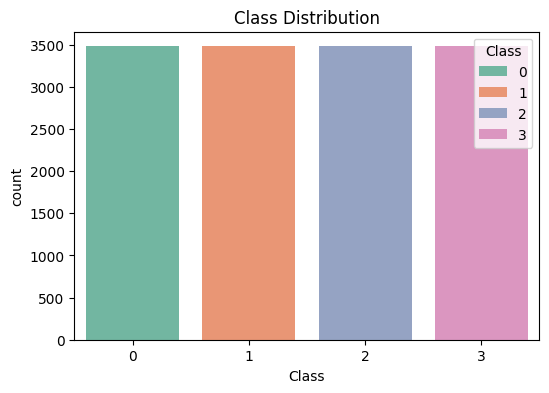

In [58]:
plt.figure(figsize=(6,4))
sns.countplot(data=y_sampled, x="Class", hue = "Class", palette="Set2")
plt.title('Class Distribution')
plt.show()

In [62]:
# Concatenate x_sampled and y_sampled with original column names
result = pd.concat([x_sampled, y_sampled], axis=1)

In [63]:
result

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,Class
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0,1
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0,1
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0,1
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0,1
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0,3
13916,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0,3
13917,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0,3
13918,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0,3


In [64]:
result.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'T3', 'TT4', 'T4U', 'FTI',
       'Class'],
      dtype='object')

In [72]:
result.to_csv('final_thyroid_1.csv', index= False)

In [ ]:
fgh = x_sampled.merge(y_sampled)

# **<font color = red>---------------------END---------------------------------------------------</font>**